## Execute a quantum circuit
https://qiskit.org/documentation/apidoc/execute.html

## Execute a quantum circuit with parameters
https://qiskit.org/documentation/tutorials/circuits_advanced/01_advanced_circuits.html

## Optimize for transpiler
https://www.youtube.com/watch?v=xWJbfyE9Vi4/

![Doc](resources/QuantumRegister.png)

![Doc](resources/QuantumCircuit.png)

![Doc](resources/QuantumCircuitHGate.png)

![Doc](resources/QuantumCircuitHGateCirc.png)

In [14]:
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit import execute
from qiskit import BasicAer
import numpy as np

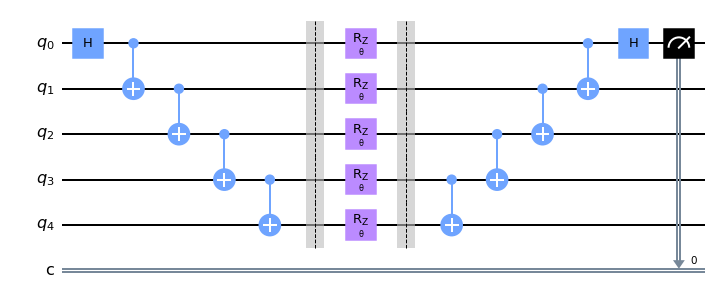

In [1]:
theta = Parameter('θ')
n = 5
qc = QuantumCircuit(5, 1)

qc.h(0)
for i in range(n-1):
    qc.cx(i, i+1)

qc.barrier()
qc.rz(theta, range(5))
qc.barrier()

for i in reversed(range(n-1)):
    qc.cx(i, i+1)
qc.h(0)
qc.measure(0, 0)

qc.draw('mpl')

In [22]:
print(qc.parameters[0])

θ


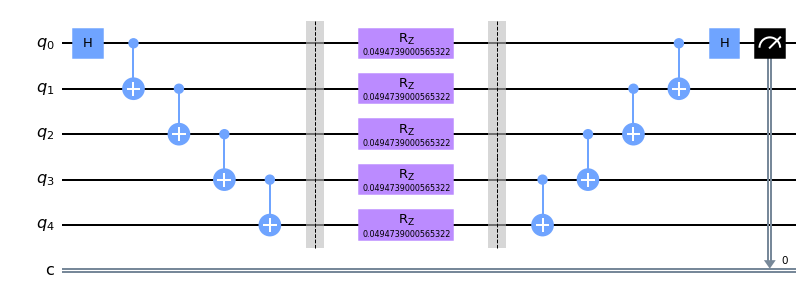

In [23]:


theta_range = np.linspace(0, 2 * np.pi, 128)

circuits = [qc.bind_parameters({qc.parameters[0]: theta_val})
            for theta_val in theta_range]


circuits[1].draw('mpl')

In [20]:
job = execute(qc,
              backend=BasicAer.get_backend('qasm_simulator'),
              parameter_binds=[{theta: theta_val} for theta_val in theta_range])

counts = job.result().get_counts()
print(counts[0])
print(counts[1])
print(counts[2])
print(len(counts))

{'0': 1024}
{'0': 1006, '1': 18}
{'0': 954, '1': 70}
128


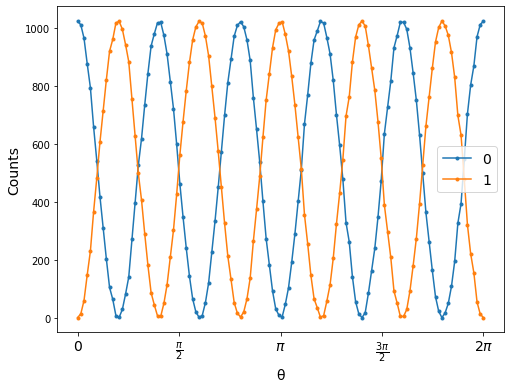

In [16]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.plot(theta_range, list(map(lambda c: c.get('0', 0), counts)), '.-', label='0')
ax.plot(theta_range, list(map(lambda c: c.get('1', 0), counts)), '.-', label='1')

ax.set_xticks([i * np.pi / 2 for i in range(5)])
ax.set_xticklabels(['0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'], fontsize=14)
ax.set_xlabel('θ', fontsize=14)
ax.set_ylabel('Counts', fontsize=14)
ax.legend(fontsize=14)

Circuits :)

/Users/iuliazidaru/opt/anaconda3/envs/qiskit-certification-resources/lib/python3.9/site-packages/qiskit/visualization/state_visualization.py:705: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


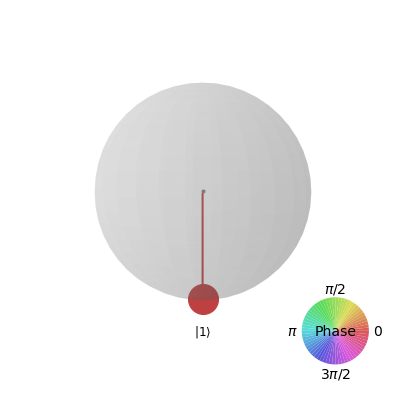

In [4]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_state_qsphere
from numpy import pi

qreg_q = QuantumRegister(1, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.x(qreg_q[0])

plot_state_qsphere(circuit)

/Users/iuliazidaru/opt/anaconda3/envs/qiskit-certification-resources/lib/python3.9/site-packages/qiskit/visualization/state_visualization.py:705: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


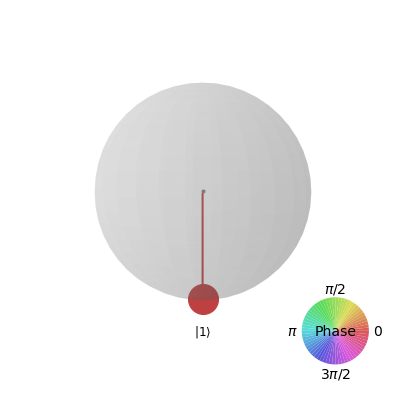

In [5]:
qreg_q = QuantumRegister(1, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.x(qreg_q[0])
circuit.z(qreg_q[0])
plot_state_qsphere(circuit)

     ┌───┐     
q_0: ┤ H ├─────
     ├───┤┌───┐
q_1: ┤ X ├┤ H ├
     └───┘└───┘
c: 1/══════════
               


/Users/iuliazidaru/opt/anaconda3/envs/qiskit-certification-resources/lib/python3.9/site-packages/qiskit/visualization/state_visualization.py:705: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


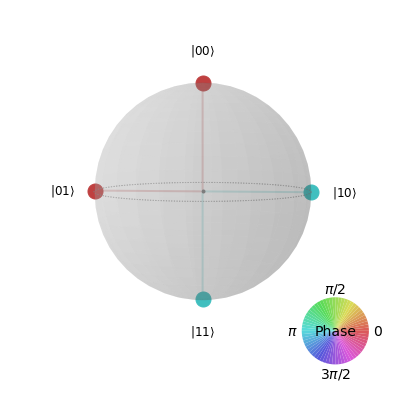

In [8]:
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.x(qreg_q[1])
circuit.h(qreg_q)
print(circuit)
plot_state_qsphere(circuit)
